# Data Analys

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_parquet("../train.pq")
test = pd.read_parquet("../test.pq")
books = pd.read_parquet("../books.pq")

print(train.shape, test.shape, books.shape)

(11971437, 5) (3134593, 2) (34322, 8)


In [15]:
print("Train:")
print(train.head(5))
print("Test:")
print(test.head(5))
print("Books:")
print(books.head(5))

Train:
                            user_id  item_id  is_read  rating  \
0  90998a29029ecb1fbeedaff2b7175207     8473    False       0   
1  90998a29029ecb1fbeedaff2b7175207    20060    False       0   
2  90998a29029ecb1fbeedaff2b7175207     8354    False       0   
3  90998a29029ecb1fbeedaff2b7175207    11575    False       0   
4  90998a29029ecb1fbeedaff2b7175207    11861    False       0   

           date_added  
0 2014-05-15 12:51:13  
1 2014-05-15 12:51:14  
2 2014-05-15 12:51:17  
3 2014-05-15 12:51:19  
4 2014-05-15 12:51:20  
Test:
                            user_id  item_id
0  00000377eea48021d3002730d56aca9a    13252
1  00009ab2ed8cbfceda5a59da40966321     2328
2  00009e46d18f223a82b22da38586b605    28636
3  00009e46d18f223a82b22da38586b605    30197
4  0001085188e302fc6b2568de45a5f56b     2159
Books:
   item_id    series                                               tags  \
0        0    [None]  [e-book, young-adult, read-in-2016, books-11-2...   
1        1  [149079]  [pr

In [4]:
train_items = set(train["item_id"].unique())
test_items = set(test["item_id"].unique())

warm_items = test_items & train_items
cold_items = test_items - train_items

print(f"Warm items: {len(warm_items)}")
print(f"Cold items: {len(cold_items)}")

Warm items: 25592
Cold items: 1775


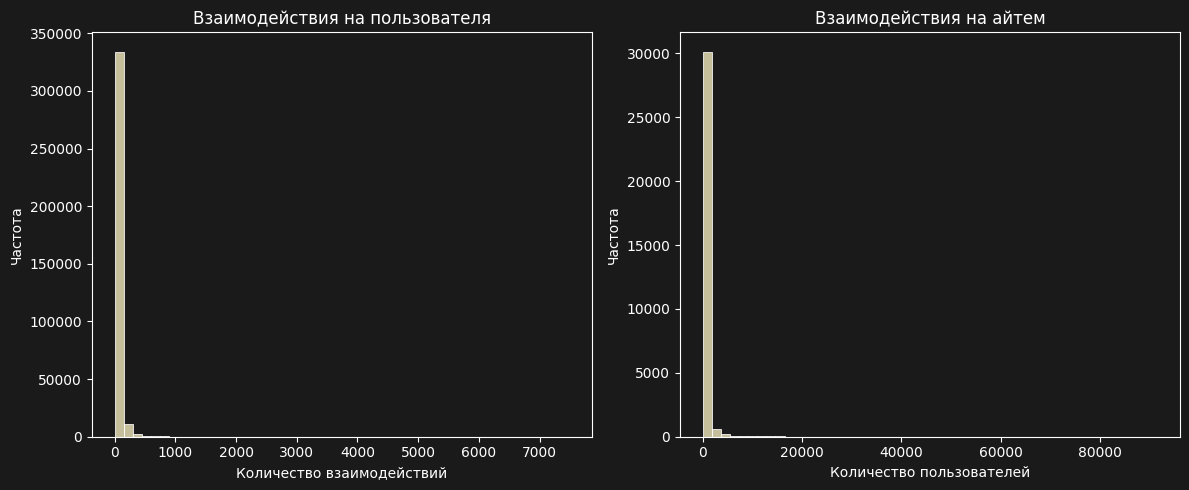

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
custom_params = {
    "axes.facecolor": "#1A1A1A",
    "figure.facecolor": "#1A1A1A",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.prop_cycle": plt.cycler(color=sns.color_palette("YlOrBr", 10))
}
plt.rcParams.update(custom_params)
user_inter_count = train.groupby("user_id")["item_id"].count()
item_inter_count = train.groupby("item_id")["user_id"].count()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(user_inter_count, bins=50, ax=axes[0])
axes[0].set_title("Взаимодействия на пользователя")
axes[0].set_xlabel("Количество взаимодействий")
axes[0].set_ylabel("Частота")

sns.histplot(item_inter_count, bins=50, ax=axes[1])
axes[1].set_title("Взаимодействия на айтем")
axes[1].set_xlabel("Количество пользователей")
axes[1].set_ylabel("Частота")

plt.tight_layout()
plt.show()


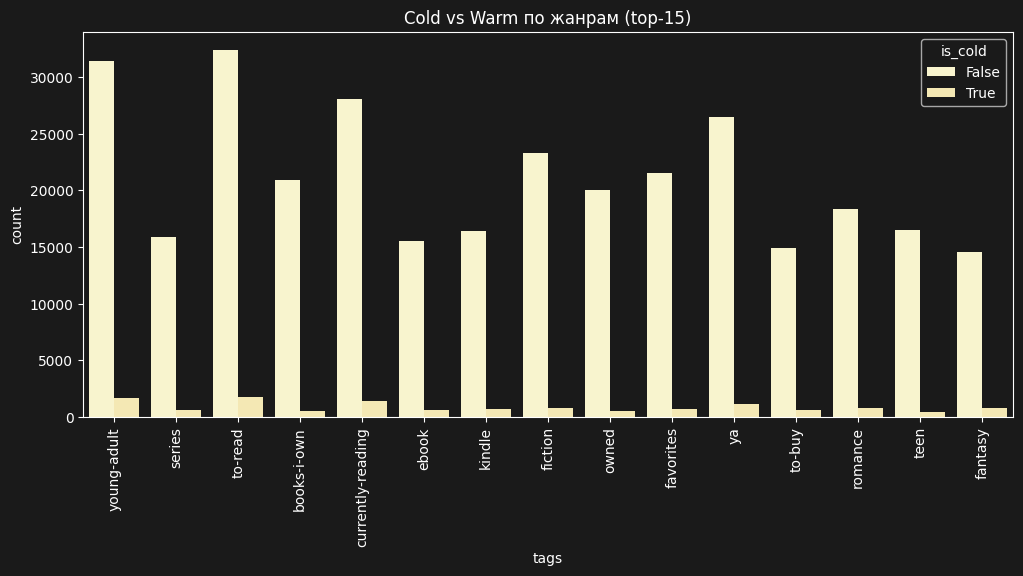

In [ ]:
books["is_cold"] = books["item_id"].isin(cold_items)
books_exploded = books.explode("tags")
top_tags = books_exploded["tags"].value_counts().head(15).index

plt.figure(figsize=(12,5))
sns.countplot(data=books_exploded[books_exploded["tags"].isin(top_tags)],
              x="tags", hue="is_cold")
plt.xticks(rotation=90)
plt.title("Cold vs Warm по жанрам (top-15)")
plt.show()
